In [7]:
%matplotlib inline
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imagecodecs
from io import BytesIO

# Ensure output directory exists
output_dir = os.path.join("tests", "out")
os.makedirs(output_dir, exist_ok=True)


# Path to binary
possible_paths = [
    os.path.join("..", "target", "release", "jpegexp.exe"),
    os.path.join("target", "release", "jpegexp.exe"),
    os.path.join("..", "target", "debug", "jpegexp.exe"),
    os.path.join("target", "debug", "jpegexp.exe")
]
BINARY_PATH = None
for p in possible_paths:
    if os.path.exists(p):
        BINARY_PATH = os.path.abspath(p)
        break

if not BINARY_PATH:
    print(f"WARNING: Binary not found in {possible_paths}. Please build it first.")
else:
    print(f"Using binary: {BINARY_PATH}")


Using binary: c:\Users\aroja\CODE\jpegexp-rs\target\release\jpegexp.exe


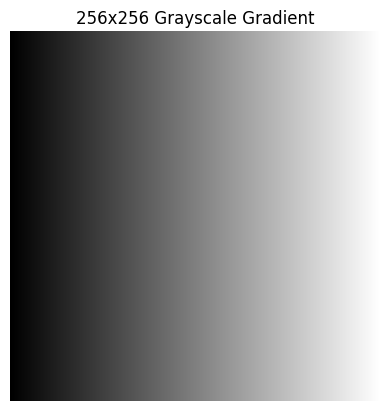

In [ ]:
# Generate a 256x256 synthetic grayscale gradient image
gradient = np.tile(np.linspace(0, 255, 256, dtype=np.uint8), (256, 1))
img = Image.fromarray(gradient, mode='L')
plt.imshow(img, cmap='gray')
plt.title("256x256 Grayscale Gradient")
plt.axis('off')
plt.show()


# Encode the image to JPEG-LS using imagecodecs
jpeg_ls_bytes = imagecodecs.jpegls_encode(np.array(img))
jpeg_bytes = imagecodecs.jpeg_encode(np.array(img))
jpeg_2k_bytes = imagecodecs.jpeg2k_encode(np.array(img), level=5)

# Save the encoded JPEG-LS to a file
jpeg_ls_path = os.path.join(output_dir, "gradient.jls")
with open(jpeg_ls_path, "wb") as f:
    f.write(jpeg_ls_bytes)

jpeg_path = os.path.join(output_dir, "gradient.jpg")
with open(jpeg_path, "wb") as f:
    f.write(jpeg_bytes)

jpeg_2k_path = os.path.join(output_dir, "gradient.jp2")
with open(jpeg_2k_path, "wb") as f:
    f.write(jpeg_2k_bytes)

print(f"images saved to: {jpeg_ls_path}, {jpeg_path}, {jpeg_2k_path}")

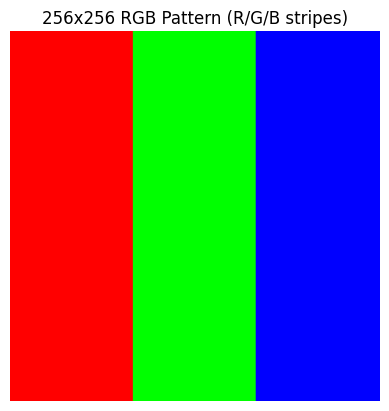

RGB images saved to: tests\out\rgb_pattern.jls, tests\out\rgb_pattern.jpg, tests\out\rgb_pattern.jp2


In [14]:
# Generate a 256x256 synthetic RGB pattern image (e.g., vertical stripes of R, G, B)
rgb_pattern = np.zeros((256, 256, 3), dtype=np.uint8)
stripe_width = 256 // 3
rgb_pattern[:, :stripe_width, 0] = 255   # Red stripe
rgb_pattern[:, stripe_width:2*stripe_width, 1] = 255  # Green stripe
rgb_pattern[:, 2*stripe_width:, 2] = 255  # Blue stripe

img_rgb = Image.fromarray(rgb_pattern, mode='RGB')
plt.imshow(img_rgb)
plt.title("256x256 RGB Pattern (R/G/B stripes)")
plt.axis('off')
plt.show()

# Encode the RGB image to JPEG-LS, JPEG, and JPEG 2000
jpeg_ls_rgb_bytes = imagecodecs.jpegls_encode(np.array(img_rgb))
jpeg_rgb_bytes = imagecodecs.jpeg_encode(np.array(img_rgb))
jpeg_2k_rgb_bytes = imagecodecs.jpeg2k_encode(np.array(img_rgb), level=5)

# Save the encoded files
jpeg_ls_rgb_path = os.path.join(output_dir, "rgb_pattern.jls")
with open(jpeg_ls_rgb_path, "wb") as f:
    f.write(jpeg_ls_rgb_bytes)

jpeg_rgb_path = os.path.join(output_dir, "rgb_pattern.jpg")
with open(jpeg_rgb_path, "wb") as f:
    f.write(jpeg_rgb_bytes)

jpeg_2k_rgb_path = os.path.join(output_dir, "rgb_pattern.jp2")
with open(jpeg_2k_rgb_path, "wb") as f:
    f.write(jpeg_2k_rgb_bytes)

print(f"RGB images saved to: {jpeg_ls_rgb_path}, {jpeg_rgb_path}, {jpeg_2k_rgb_path}")